<a href="https://colab.research.google.com/github/gasparmamac/DeepLearningNotebook/blob/main/Keras_Image_Dataset_from_Directory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [63]:
import os
import tensorflow as tf
import glob as glob
import matplotlib.pyplot as plt
import random
import numpy as np
from dataclasses import dataclass
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow import keras
from tensorflow.keras import layers

plt.rcParams['figure.figsize'] = (12, 9)
block_plot = False

# fix seed for reproducibility
SEED_VALUE = 42
random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
# tf.random.set_seed(SEED_VALUE)

<h1>2 Dataset Exploration

2.1 Download and extract the dataset

In [64]:
import requests

def download_file(url, save_name):
  url = url
  file = requests.get(url)

  open(save_name, 'wb').write(file.content)

download_file('https://www.dropbox.com/s/6nrjxr2ycnpcy63/dataset_balls.zip?dl=1', 'dataset_balls.zip')

In [65]:
import zipfile

zip_file = 'dataset_balls.zip'
try:
  with zipfile.ZipFile(zip_file) as z:
    z.extractall('./')
    print('Extracted all')

except:
  print('Invalid file')

Extracted all


In [66]:
# class names
class_names = sorted([f for f in os.listdir('./dataset_balls/train') if not f.startswith('.')])

for i in range(len(class_names)):
  print(i, class_names[i])

0 baseball
1 basketball
2 beachballs
3 billiard ball
4 bowling ball
5 brass
6 buckeyballs
7 cannon ball
8 cricket ball
9 eyeballs


2.2 Datase Visualization

In [67]:
def get_all_image_paths(dir_path):

  # retrieve all the images paths
  image_paths = glob.glob(f'{dir_path}/train/*/*', recursive=True)
  return image_paths

In [68]:
def display_dataset_samples(image_paths):

  plt.figure(figsize=(18, 12))
  num_rows = 5
  num_cols = 8
  for i in range(num_rows*num_cols):
    plt.subplot(num_rows, num_cols, i+1)

    # generate a random index
    random_idx = random.choice(list(range(0, len(image_paths))))
    image = plt.imread(image_paths[random_idx])
    label = image_paths[random_idx].split('/')[-2]
    plt.imshow(image)
    plt.axis('off')
    plt.title(label)

  plt.show()

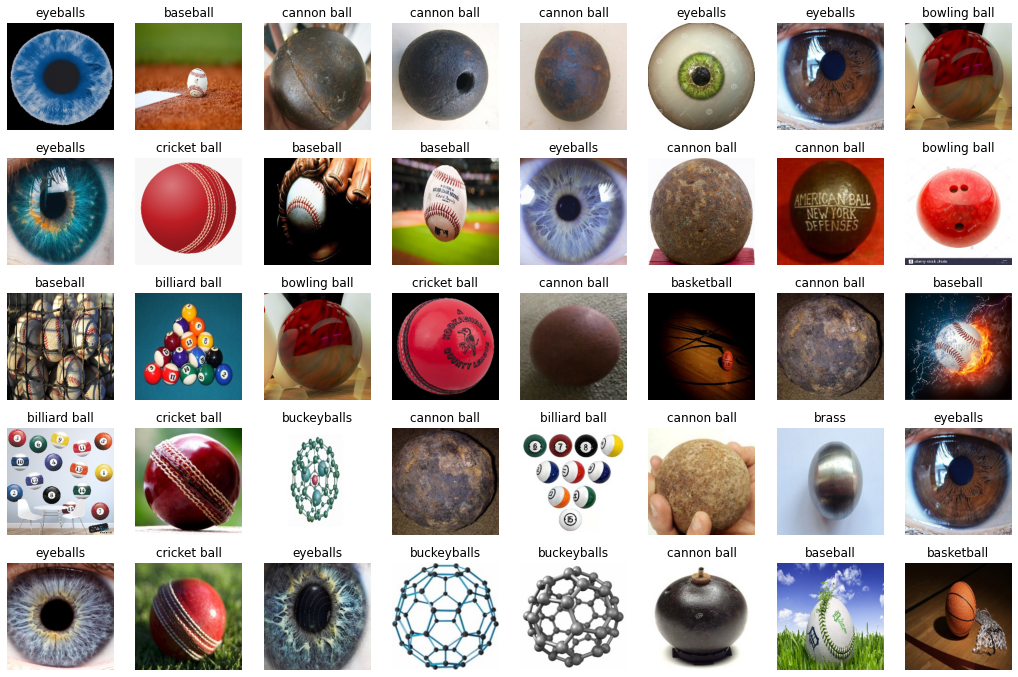

In [69]:
# get all the image paths
image_paths = get_all_image_paths('./dataset_balls')

# display several random images from the dataset
display_dataset_samples(image_paths)

<h1>3 Using Image_dataset_from_directory

In [70]:
@dataclass(frozen=True)
class DatasetConfig:
  NUM_CLASSES: int = 10
  IMG_HEIGHT: int = 224
  IMG_WIDTH: int = 224
  NUM_CHANNELS: int = 3
  BATCH_SIZE: int = 64
  DATA_ROOT: str = './dataset_balls'

@dataclass(frozen=True)
class TrainingConfig:
  EPOCHS: int = 21
  LEARNING_RATE: float = 0.001
  CHECKPOINT_DIR: str = './saved_models_balls'

data_config = DatasetConfig()
training_config = TrainingConfig()

# set data paths
train_path = os.path.join(data_config.DATA_ROOT, 'train')
valid_path = os.path.join(data_config.DATA_ROOT, 'valid')

3.2 Create BatchDataset Objects

In [71]:
input_shape = (data_config.IMG_HEIGHT, data_config.IMG_WIDTH)
batch_size = data_config.BATCH_SIZE

train_dataset = image_dataset_from_directory(directory=train_path,
                                             image_size=input_shape,
                                             batch_size=batch_size,
                                             seed=SEED_VALUE,
                                             label_mode='categorical'
                                             )

valid_dataset = image_dataset_from_directory(directory=valid_path,
                                             image_size=input_shape,
                                             batch_size=batch_size,
                                             seed=SEED_VALUE,
                                             label_mode='categorical',
                                             )

Found 1125 files belonging to 10 classes.
Found 200 files belonging to 10 classes.


3.3 Inspect BatchDataset Objects

In [72]:
# Print the data shape of the data and the associated labels
for data_batch, labels_batch in train_dataset:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (64, 224, 224, 3)
labels batch shape: (64, 10)


In [73]:
# the followin command will print the various attributes foe the BatchDataset object
[m for m in dir(valid_dataset) if not m.startswith('_')]

['apply',
 'as_numpy_iterator',
 'batch',
 'bucket_by_sequence_length',
 'cache',
 'cardinality',
 'choose_from_datasets',
 'class_names',
 'concatenate',
 'counter',
 'element_spec',
 'enumerate',
 'file_paths',
 'filter',
 'flat_map',
 'from_generator',
 'from_tensor_slices',
 'from_tensors',
 'get_single_element',
 'group_by_window',
 'ignore_errors',
 'interleave',
 'list_files',
 'load',
 'map',
 'options',
 'padded_batch',
 'prefetch',
 'random',
 'range',
 'rebatch',
 'reduce',
 'rejection_resample',
 'repeat',
 'sample_from_datasets',
 'save',
 'scan',
 'shard',
 'shuffle',
 'skip',
 'snapshot',
 'take',
 'take_while',
 'unbatch',
 'unique',
 'window',
 'with_options',
 'zip']

In [74]:
# Use the object attribute (class names) to access the calss names in the dataset
valid_dataset.class_names

['baseball',
 'basketball',
 'beachballs',
 'billiard ball',
 'bowling ball',
 'brass',
 'buckeyballs',
 'cannon ball',
 'cricket ball',
 'eyeballs']

3.4 Use the BatchDataset object to access the image data

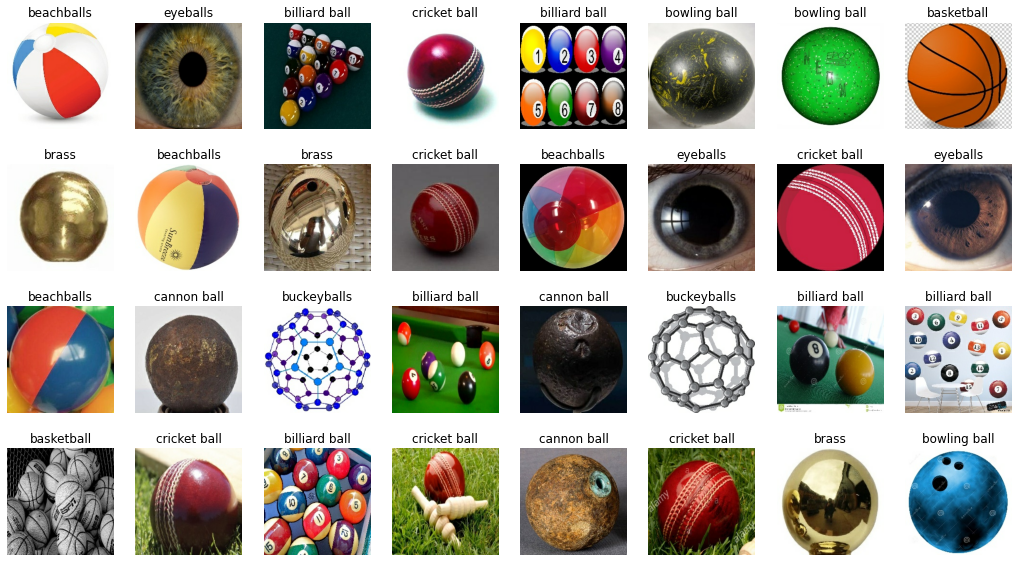

In [75]:
class_names = train_dataset.class_names

plt.figure(figsize=(18, 10))

# assume dataset batch)siez is at least 32.
num_rows = 4
num_cols = 8

# her we use the take() mehod to retirieve the first batch of data from the training portion of the dataset
for data_batch, labels_batch in train_dataset.take(1):

  # for the batch of images and the associated (one-hot encoded) labels
  # plot each of the images in the batch and the associated ground truth labels
  for i in range(num_rows*num_cols):
    ax = plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(data_batch[i].numpy().astype('uint8'))
    truth_idx = np.nonzero(labels_batch[i].numpy())
    plt.title(class_names[truth_idx[0][0]])
    plt.axis('off')



<h1>4 Train a Deep Neural Network Model

In [76]:
from prompt_toolkit import filters
# define the model
def cnn_model(input_shape=(224, 224, 3), num_classes=10):

  # input layer and Conv Block1: 32-32-Maxpool
  inputs = keras.Input(shape=input_shape)
  x = layers.Rescaling(1./255)(inputs)
  
  x = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
  x = layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu')(x)
  x = layers.MaxPool2D(pool_size=2, strides=2)(x)

  # conv block2: 64-64-maxpool
  x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
  x = layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu')(x)
  x = layers.MaxPool2D(pool_size=2, strides=2)(x)

  # conv block 3: 128-128-maxpool
  x = layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
  x = layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu')(x)
  x = layers.MaxPool2D(pool_size=2, strides=2)(x)

  # conv block 4: 256-256-maxpool
  x = layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
  x = layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu')(x)
  x = layers.MaxPool2D(pool_size=2, strides=2)(x)

  # flatten the convolutional features
  x = layers.Flatten()(x)

  # fully connected layers
  x = layers.Dense(512,  activation='relu')(x)
  outputs = layers.Dense(num_classes, activation='softmax')(x)

  model = keras.Model(inputs=inputs, outputs=outputs)

  return model

In [77]:
# define the input shape
input_shape = (data_config.IMG_HEIGHT, data_config.IMG_WIDTH, data_config.NUM_CHANNELS)

# create the model
model = cnn_model(input_shape=input_shape, num_classes=data_config.NUM_CLASSES)

print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d_30 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_31 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 112, 112, 64)      18496     
                                                           

In [78]:
# comppile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=training_config.LEARNING_RATE),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [79]:
# create ta model checkpoint callback to save the 'best' model based on the highest validation acuuracy
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=training_config.CHECKPOINT_DIR,
                                                     save_weights_only=False,
                                                     monitor='val_accuracy',
                                                     mode='max',
                                                     save_best_only=True,
                                                     )

# train the model
training_results = model.fit(train_dataset,
                             epochs=training_config.EPOCHS,
                             validation_data=valid_dataset,
                             callbacks=model_checkpoint_callback,
                             )


Epoch 1/21
18/18 [==============================] - ETA: 0s - loss: 2.4916 - accuracy: 0.1404

18/18 [==============================] - 12s 509ms/step - loss: 2.4916 - accuracy: 0.1404 - val_loss: 2.2971 - val_accuracy: 0.1200
Epoch 2/21
18/18 [==============================] - ETA: 0s - loss: 2.1399 - accuracy: 0.2204

18/18 [==============================] - 9s 480ms/step - loss: 2.1399 - accuracy: 0.2204 - val_loss: 1.9026 - val_accuracy: 0.2550
Epoch 3/21
18/18 [==============================] - ETA: 0s - loss: 1.7713 - accuracy: 0.3511

18/18 [==============================] - 9s 467ms/step - loss: 1.7713 - accuracy: 0.3511 - val_loss: 1.7345 - val_accuracy: 0.3350
Epoch 4/21
18/18 [==============================] - ETA: 0s - loss: 1.6102 - accuracy: 0.4258

18/18 [==============================] - 9s 493ms/step - loss: 1.6102 - accuracy: 0.4258 - val_loss: 1.5890 - val_accuracy: 0.4750
Epoch 5/21
18/18 [==============================] - ETA: 0s - loss: 1.4434 - accuracy: 0.4889

18/18 [==============================] - 9s 470ms/step - loss: 1.4434 - accuracy: 0.4889 - val_loss: 1.3920 - val_accuracy: 0.4850
Epoch 6/21
18/18 [==============================] - ETA: 0s - loss: 1.3050 - accuracy: 0.5511

18/18 [==============================] - 9s 483ms/step - loss: 1.3050 - accuracy: 0.5511 - val_loss: 1.2965 - val_accuracy: 0.5550
Epoch 7/21
18/18 [==============================] - ETA: 0s - loss: 1.0207 - accuracy: 0.6409

18/18 [==============================] - 9s 455ms/step - loss: 1.0207 - accuracy: 0.6409 - val_loss: 1.0967 - val_accuracy: 0.6150
Epoch 8/21
18/18 [==============================] - 6s 274ms/step - loss: 0.8044 - accuracy: 0.7307 - val_loss: 1.1919 - val_accuracy: 0.6050
Epoch 9/21
18/18 [==============================] - ETA: 0s - loss: 0.6822 - accuracy: 0.7742

18/18 [==============================] - 9s 484ms/step - loss: 0.6822 - accuracy: 0.7742 - val_loss: 1.3340 - val_accuracy: 0.6300
Epoch 10/21
18/18 [==============================] - ETA: 0s - loss: 0.5052 - accuracy: 0.8373

18/18 [==============================] - 9s 483ms/step - loss: 0.5052 - accuracy: 0.8373 - val_loss: 1.2552 - val_accuracy: 0.6550
Epoch 11/21
18/18 [==============================] - 6s 272ms/step - loss: 0.4033 - accuracy: 0.8587 - val_loss: 1.3154 - val_accuracy: 0.6400
Epoch 12/21
18/18 [==============================] - ETA: 0s - loss: 0.3566 - accuracy: 0.8800

18/18 [==============================] - 9s 504ms/step - loss: 0.3566 - accuracy: 0.8800 - val_loss: 1.3134 - val_accuracy: 0.6850
Epoch 13/21
18/18 [==============================] - 5s 273ms/step - loss: 0.2287 - accuracy: 0.9147 - val_loss: 1.5660 - val_accuracy: 0.6750
Epoch 14/21
18/18 [==============================] - 5s 279ms/step - loss: 0.2096 - accuracy: 0.9280 - val_loss: 1.8943 - val_accuracy: 0.6300
Epoch 15/21
18/18 [==============================] - 5s 273ms/step - loss: 0.2260 - accuracy: 0.9298 - val_loss: 1.7704 - val_accuracy: 0.6150
Epoch 16/21
18/18 [==============================] - 6s 292ms/step - loss: 0.1959 - accuracy: 0.9333 - val_loss: 1.5904 - val_accuracy: 0.6700
Epoch 17/21
18/18 [==============================] - 6s 281ms/step - loss: 0.1138 - accuracy: 0.9636 - val_loss: 2.1916 - val_accuracy: 0.6300
Epoch 18/21
18/18 [==============================] - 6s 289ms/step - loss: 0.0517 - accuracy: 0.9796 - val_loss: 2.7415 - val_accuracy: 0.6450
Epoch 19/21

18/18 [==============================] - 9s 464ms/step - loss: 0.0409 - accuracy: 0.9840 - val_loss: 2.6842 - val_accuracy: 0.7200
Epoch 20/21
18/18 [==============================] - 5s 275ms/step - loss: 0.0697 - accuracy: 0.9733 - val_loss: 2.5596 - val_accuracy: 0.6250
Epoch 21/21
18/18 [==============================] - 5s 273ms/step - loss: 0.0402 - accuracy: 0.9858 - val_loss: 3.0442 - val_accuracy: 0.6500


4.1 Plotting Training Results

In [80]:
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)

def plot_results(metrics, ylabel=None, ylim=None, metric_name=None, color=None):
    
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]
        
    for idx, metric in enumerate(metrics):    
        ax.plot(metric, color=color[idx])
    
    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(ylabel)
    plt.xlim([0, training_config.EPOCHS-1])
    plt.ylim(ylim)
    # Tailor x-axis tick marks
    ax.xaxis.set_major_locator(MultipleLocator(2))
    ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)   
    plt.show(block=block_plot)
    plt.close()

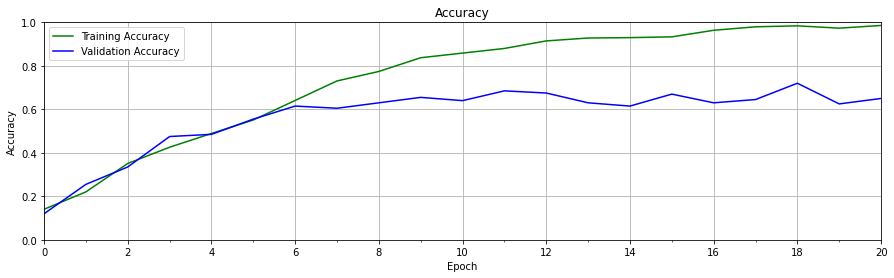

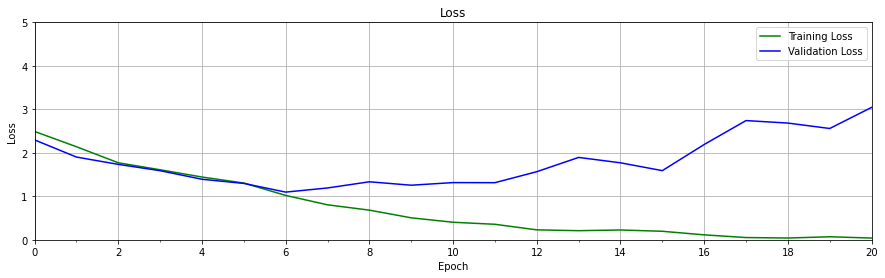

In [81]:
# retrieve training results
train_loss = training_results.history['loss']
train_acc = training_results.history['accuracy']
valid_loss = training_results.history['val_loss']
valid_acc = training_results.history['val_accuracy']

plot_results([train_acc, valid_acc],
             ylabel='Accuracy',
             ylim=[0.0, 1.0],
             metric_name=['Training Accuracy', 'Validation Accuracy'],
             color=['g', 'b'])

plot_results([train_loss, valid_loss],
             ylabel = 'Loss',
             ylim=[0.0, 5.0],
             metric_name=['Training Loss', 'Validation Loss'],
             color=['g', 'b'])

<h1>Model Evaluation

In [82]:
valid_loss, valid_acc = model.evaluate(valid_dataset)
print(f'Validation accuracy: {valid_acc: .3f}')

4/4 [==============================] - 0s 56ms/step - loss: 3.0442 - accuracy: 0.6500
Validation accuracy:  0.650


In [83]:
def evaluate_model(dataset, checkpoint_dir=None):

  if not checkpoint_dir:
    checkpoint_dir = os.path.join(os.getcwd(), training_config.CHECKPOINT_DIR)

  # load save model
  model = tf.keras.models.load_model(checkpoint_dir)

  num_matches = 0
  plt.figure(figsize=(17, 12))
  num_rows = 5
  num_cols = 6
  class_names = dataset.class_names
  
  # retrieve a single batch
  for data_batch, labels_batch in dataset.take(1):

    predictions = model.predict(data_batch)

    for idx in range(num_rows*num_cols):
      ax = plt.subplot(num_rows, num_cols, idx +1)
      plt.axis('off')
      plt.imshow(data_batch[idx].numpy().astype('uint8'))

      pred_idx = tf.argmax(predictions[idx]).numpy()

      title = str(class_names[truth_idx[0][0]] + " : " + str(class_names[pred_idx]))
      title_obj = plt.title(title, fontdict={'fontsize':11})

      if pred_idx == truth_idx:
        num_matches += 1
        plt.setp(title_obj, color='g')
      else:
        plt.setp(title_obj, color='r')

      acc = num_matches/(idx+1)
    print('Prediction accuracy: ', int(100*acc)/100)

  return

2/2 [==============================] - 0s 47ms/step
Prediction accuracy:  0.06


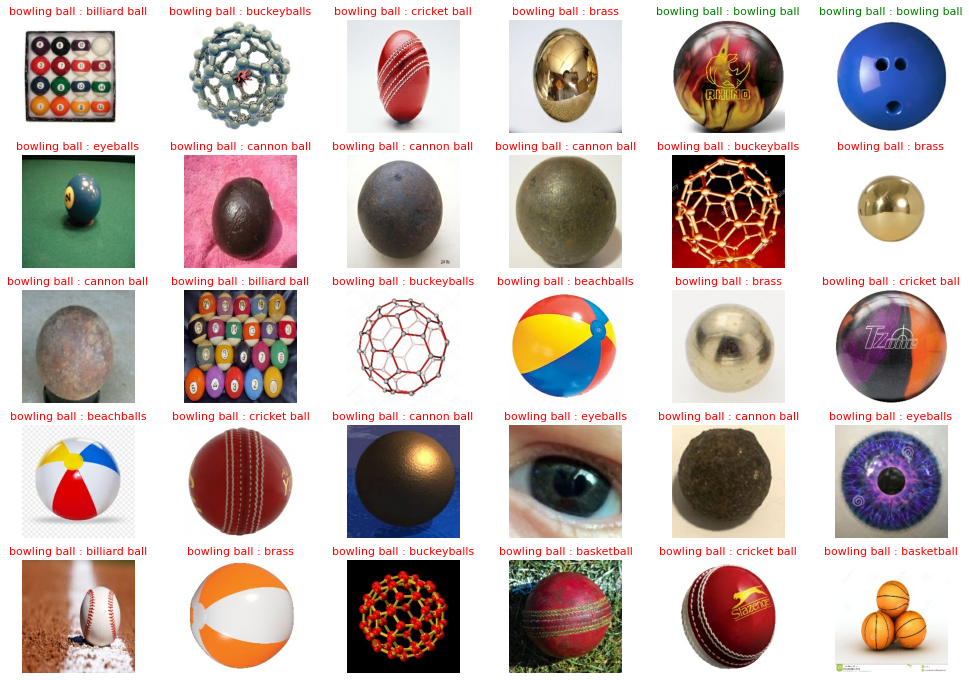

In [85]:
evaluate_model(valid_dataset, training_config.CHECKPOINT_DIR)